# EDA — Training Data (Store / Item Sales)

This notebook performs Exploratory Data Analysis (EDA) on the training dataset.
Main goals:
- Understand the sales distribution
- Analyze relationships between Sales and categorical IDs (Store, Item) using bar charts
- Analyze time patterns (day of month, month of year, day of week)
- View yearly trend (Total sales per year from 2013 to 2018)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = "C:/Users/lenovo/Desktop/Demand_Analysis_Model/data/raw/train.csv"

train = pd.read_csv(train_path)

print("Train shape:", train.shape)

print("\nTrain head:")
print(train.head())

print("\nTrain dtypes:")
print(train.dtypes)
train.isnull().sum()
train[["store", "item", "sales"]].describe()
train.columns = train.columns.str.strip()
train["date"] = pd.to_datetime(train["date"], errors="coerce")
train["date"].dtype, train["date"].isna().sum()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lenovo/Desktop/Demand_Analysis_Model/data/raw/train.csv'

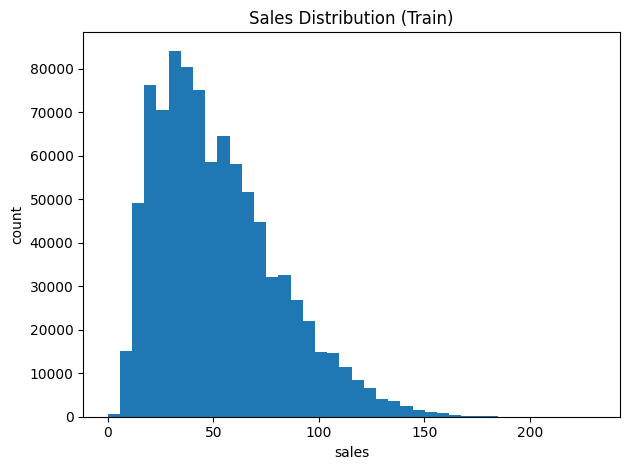

In [ ]:
plt.figure()
plt.hist(train["sales"], bins=40)
plt.title("Sales Distribution (Train)")
plt.xlabel("sales")
plt.ylabel("count")
plt.tight_layout()
plt.show()


In [19]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")

train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day
train["dayofweek"] = train["date"].dt.dayofweek  # 0=Mon

train.head()


,date,store,item,sales,year,month,day,dayofweek
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


## Why Bar Charts (Store/Item) instead of correlation?

`store` and `item` are categorical IDs.
Even if they look like numbers, they are not continuous numeric variables.

So, a correlation map may not represent the real relationship with `sales`.
Bar charts (average sales per group) are more reliable for:
- Sales vs Stores
- Sales vs Items


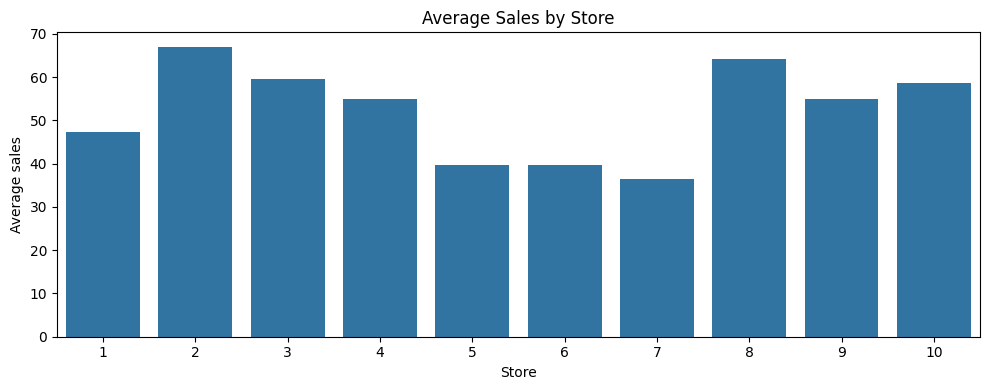

In [20]:
store_sales = train.groupby("store")["sales"].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=store_sales, x="store", y="sales")
plt.title("Average Sales by Store")
plt.xlabel("Store")
plt.ylabel("Average sales")
plt.tight_layout()
plt.show()


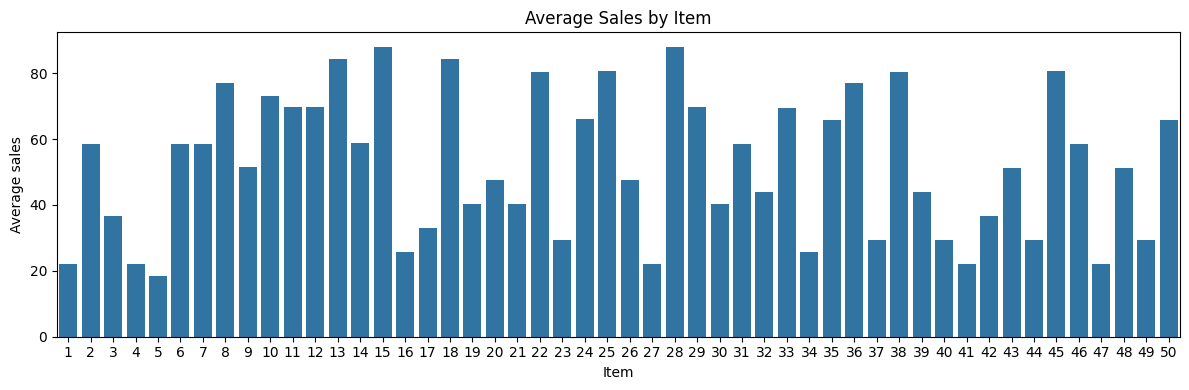

In [21]:
item_sales = train.groupby("item")["sales"].mean().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(data=item_sales, x="item", y="sales")
plt.title("Average Sales by Item")
plt.xlabel("Item")
plt.ylabel("Average sales")
plt.tight_layout()
plt.show()


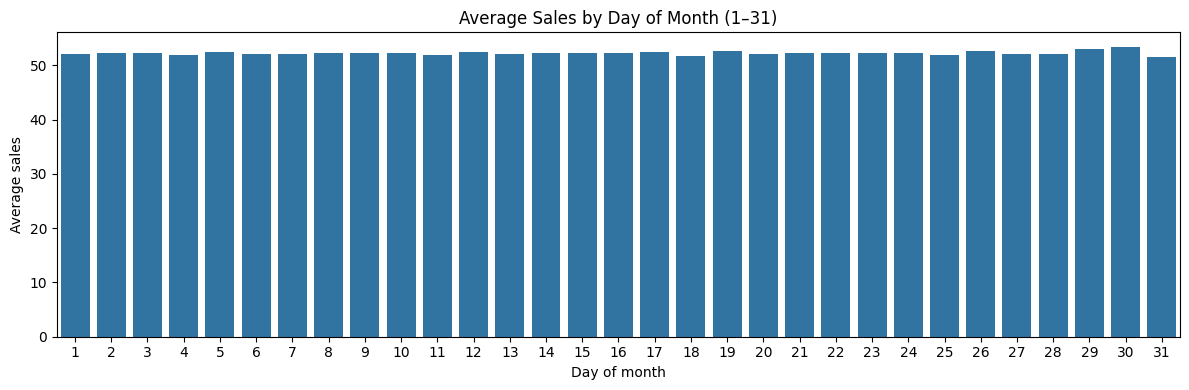

In [22]:
day_sales = train.groupby("day")["sales"].mean().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(data=day_sales, x="day", y="sales")
plt.title("Average Sales by Day of Month (1–31)")
plt.xlabel("Day of month")
plt.ylabel("Average sales")
plt.tight_layout()
plt.show()


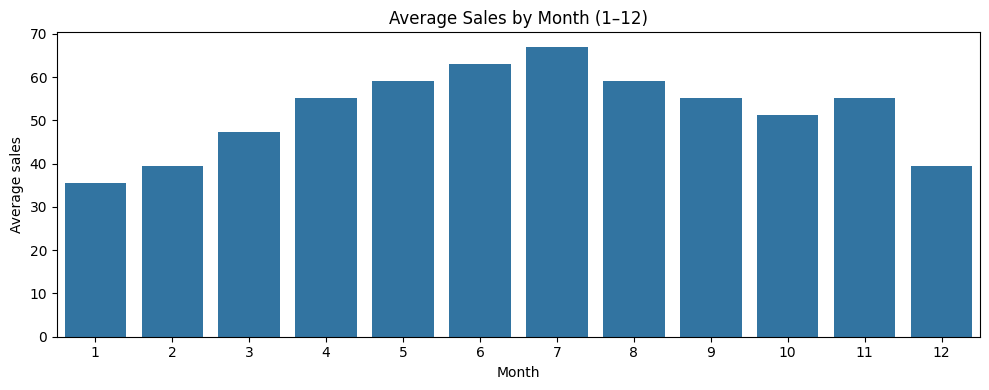

In [23]:
month_sales = train.groupby("month")["sales"].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=month_sales, x="month", y="sales")
plt.title("Average Sales by Month (1–12)")
plt.xlabel("Month")
plt.ylabel("Average sales")
plt.tight_layout()
plt.show()


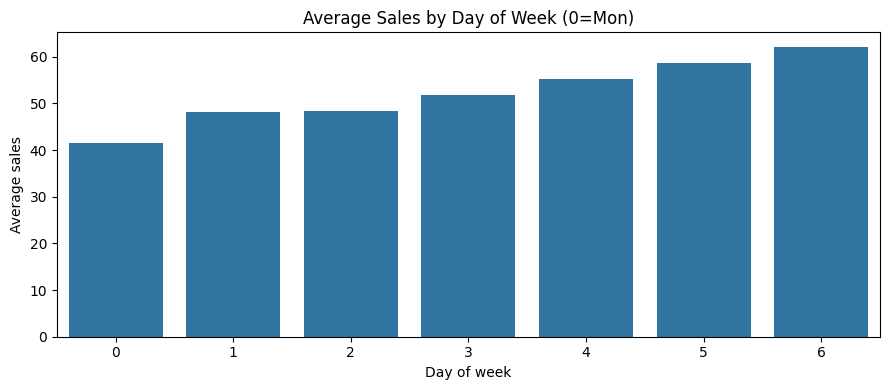

In [24]:
dow_sales = train.groupby("dayofweek")["sales"].mean().reset_index()

plt.figure(figsize=(9, 4))
sns.barplot(data=dow_sales, x="dayofweek", y="sales")
plt.title("Average Sales by Day of Week (0=Mon)")
plt.xlabel("Day of week")
plt.ylabel("Average sales")
plt.tight_layout()
plt.show()


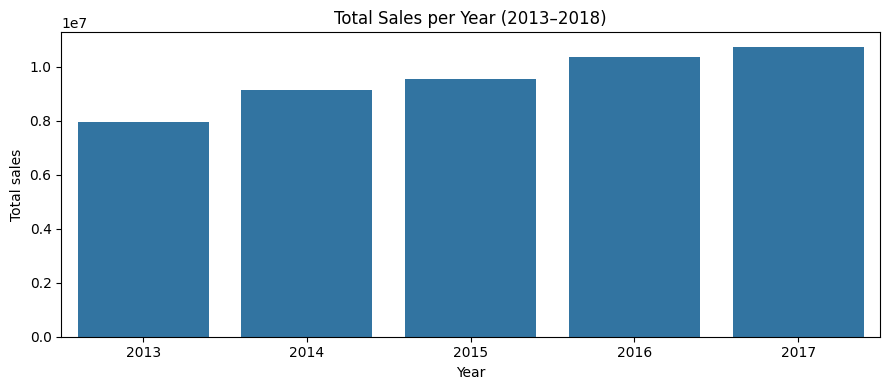

,year,sales
0,2013,7941243
1,2014,9135482
2,2015,9536887
3,2016,10357160
4,2017,10733740


In [25]:
train_2013_2018 = train[(train["year"] >= 2013) & (train["year"] <= 2018)]
year_sales = train_2013_2018.groupby("year")["sales"].sum().reset_index()

plt.figure(figsize=(9, 4))
sns.barplot(data=year_sales, x="year", y="sales")
plt.title("Total Sales per Year (2013–2018)")
plt.xlabel("Year")
plt.ylabel("Total sales")
plt.tight_layout()
plt.show()

year_sales


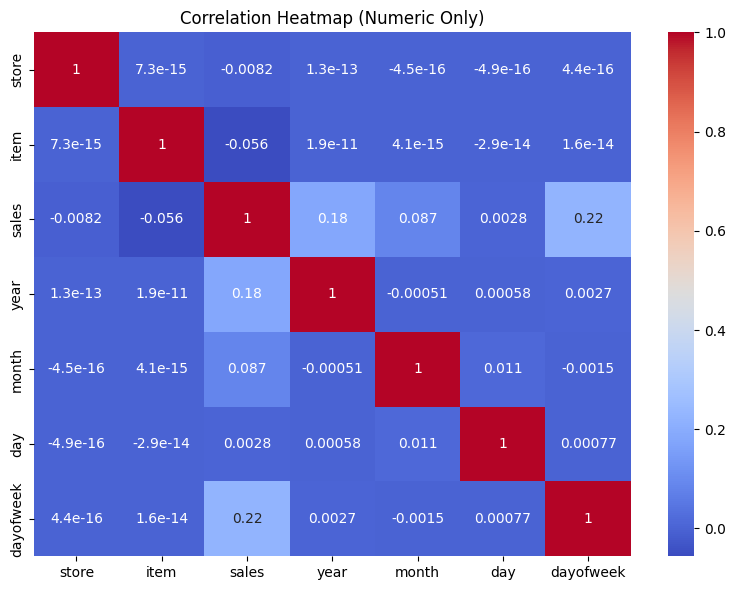

In [26]:
num_cols = ["store", "item", "sales", "year", "month", "day", "dayofweek"]
corr = train[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Only)")
plt.tight_layout()
plt.show()


# Insights (Main Conclusions)

This section summarizes the key findings from the EDA in simple English.


## 1) Sales Distribution (Data Shape)
- Sales distribution is **right-skewed**.
- Most days have normal or moderate sales.
- Some days have very high sales, which may happen during events, promotions, or peak demand periods.

## 2) Sales vs Stores
- Average sales are **different across stores**.
- Some stores consistently show higher average sales than others.
- This suggests store-level factors (location, traffic, local demand) may affect sales.

## 3) Sales vs Items
- Items have different average sales levels.
- Some items are top sellers, while others have lower demand.
- This helps identify strong products and weak products.

## 4) Sales vs Day of Month (1–31)
- Average sales by day of month is not flat.
- Some days show higher average sales.
- This may reflect monthly customer habits or periodic buying behavior.

## 5) Sales vs Month (Seasonality)
- Average sales differs from month to month.
- Some months have higher demand than others.
- This indicates a seasonal component in the data.

## 6) Weekly Pattern (Day of Week)
- Sales changes by weekday.
- Sales are often lower at the start of the week and higher near the end of the week.
- This shows a weekly cycle that forecasting models should consider.

## 7) Yearly Trend (2013–2018)
- Total sales per year show a clear upward trend from 2013 to 2018.
- The growth looks stable and close to linear.
- This suggests a long-term positive trend in demand.


In [ ]:
import os, sys
import pandas as pd

project_root = os.path.abspath(os.path.join("..", ".."))
sys.path.append(project_root)

from src.train.arima import train_arima_forecaster

y_train = train.groupby("date")["sales"].sum().sort_index()

model, y_pred, conf_int = train_arima_forecaster(y_train, n_periods=30)

y_pred[:5], conf_int[:5]
